# ACML Project

## Predicting Life Expectancy considering immunization and human development index

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import seaborn as sns 

sns.set_style("darkgrid")

## Data Description 


The data was downloaded from (https://www.kaggle.com/kumarajarshi/life-expectancy-who) on 13 April 2021. This is data from the World Health Organisation taken between 2000 and 2015. It describes the life expectancy along with the immunization factors, mortality factors, economic factors, social factors and other health related factors for 193 countries. ####

## Variable Description


#### Life expectancy
Life Expectancy in age 

#### Adult Mortality
Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

#### Status
Developed or Developing status

#### Infant deaths
Number of Infant Deaths per 1000 population

#### Alcohol
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

#### percentage expenditure
Expenditure on health as a percentage of Gross Domestic Product per capita(%)

#### Hepatitis B
Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

#### Measles
Measles - number of reported cases per 1000 population


## Load Data

In [5]:
dataset = pd.read_csv('Life Expectancy Data.csv', sep=",")

In [6]:
dataset.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
dataset.Alcohol.value_counts() 

0.01     288
0.03      15
0.04      13
0.09      12
0.02      12
        ... 
17.31      1
5.23       1
16.58      1
7.76       1
12.56      1
Name: Alcohol, Length: 1076, dtype: int64

In [10]:
#replace null alcohol with most occuring 
dataset.Alcohol.fillna(0.01,inplace=True)

In [11]:
#replace GDP null values with the median
gdp_median =dataset.GDP.median()
dataset.GDP.fillna(gdp_median,inplace=True)

In [12]:
#the rest drop the null values
dataset.dropna(inplace=True)

In [13]:
#correlation values
dataset.corr()

Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.049783        -0.037968   
Life expectancy                  0.049783          1.000000        -0.701085   
Adult Mortality                 -0.037968         -0.701085         1.000000   
infant deaths                    0.007336         -0.168918         0.042675   
Alcohol                         -0.115505          0.401946        -0.173753   
percentage expenditure           0.068363          0.409311        -0.236800   
Hepatitis B                      0.112543          0.200912        -0.104831   
Measles                         -0.054148         -0.068813        -0.003727   
 BMI                             0.007884          0.539432        -0.350715   
under-five deaths                0.009772         -0.192087         0.060567   
Polio                           -0.022700          0.326294        -0.195481   
Total expenditure                0.055879          0.174391        -0.083500   
Diphtheria                       0.023256          0.337400        -0.186440   
 HIV/AIDS                       -0.123901         -0.591609         0.550282   
GDP                              0.095342          0.441001        -0.254303   
Population                       0.011806         -0.022272        -0.014721   
 thinness  1-19 years            0.020647         -0.457460         0.271450   
 thinness 5-9 years              0.014885         -0.457154         0.286013   
Income composition of resources  0.122543          0.720750        -0.442009   
Schooling                        0.088388          0.726849        -0.421468   

                                 infant deaths   Alcohol  \
Year                                  0.007336 -0.115505   
Life expectancy                      -0.168918  0.401946   
Adult Mortality                       0.042675 -0.173753   
infant deaths                         1.000000 -0.105025   
Alcohol                              -0.105025  1.000000   
percentage expenditure               -0.090364  0.417787   
Hepatitis B                          -0.231046  0.111907   
Measles                               0.532757 -0.048984   
 BMI                                 -0.234319  0.349281   
under-five deaths                     0.996906 -0.099855   
Polio                                -0.154273  0.244289   
Total expenditure                    -0.145481  0.219070   
Diphtheria                           -0.158383  0.248163   
 HIV/AIDS                             0.007990 -0.025496   
GDP                                  -0.097759  0.443820   
Population                            0.671803 -0.028121   
 thinness  1-19 years                 0.462976 -0.404110   
 thinness 5-9 years                   0.461563 -0.386327   
Income composition of resources      -0.134754  0.559614   
Schooling                            -0.214038  0.616334   

                                 percentage expenditure  Hepatitis B  \
Year                                           0.068363     0.112543   
Life expectancy                                0.409311     0.200912   
Adult Mortality                               -0.236800    -0.104831   
infant deaths                                 -0.090364    -0.231046   
Alcohol                                        0.417787     0.111907   
percentage expenditure                         1.000000     0.017599   
Hepatitis B                                    0.017599     1.000000   
Measles                                       -0.062651    -0.124198   
 BMI                                           0.241237     0.140768   
under-five deaths                             -0.091737    -0.240005   
Polio                                          0.129966     0.463044   
Total expenditure                              0.185353     0.115247   
Diphtheria                                     0.136626     0.584697   
 HIV/AIDS                                     -0.094427    -0.093970   
GDP            

<AxesSubplot:>

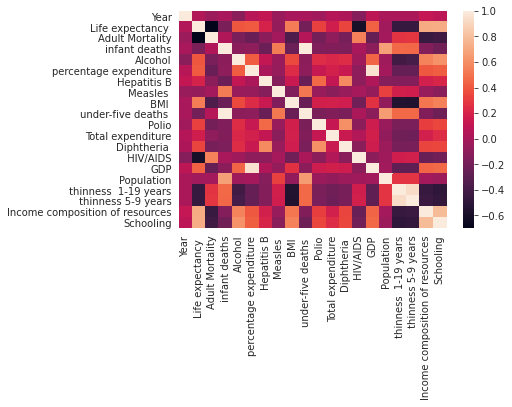

In [14]:
sns.heatmap(dataset.corr())

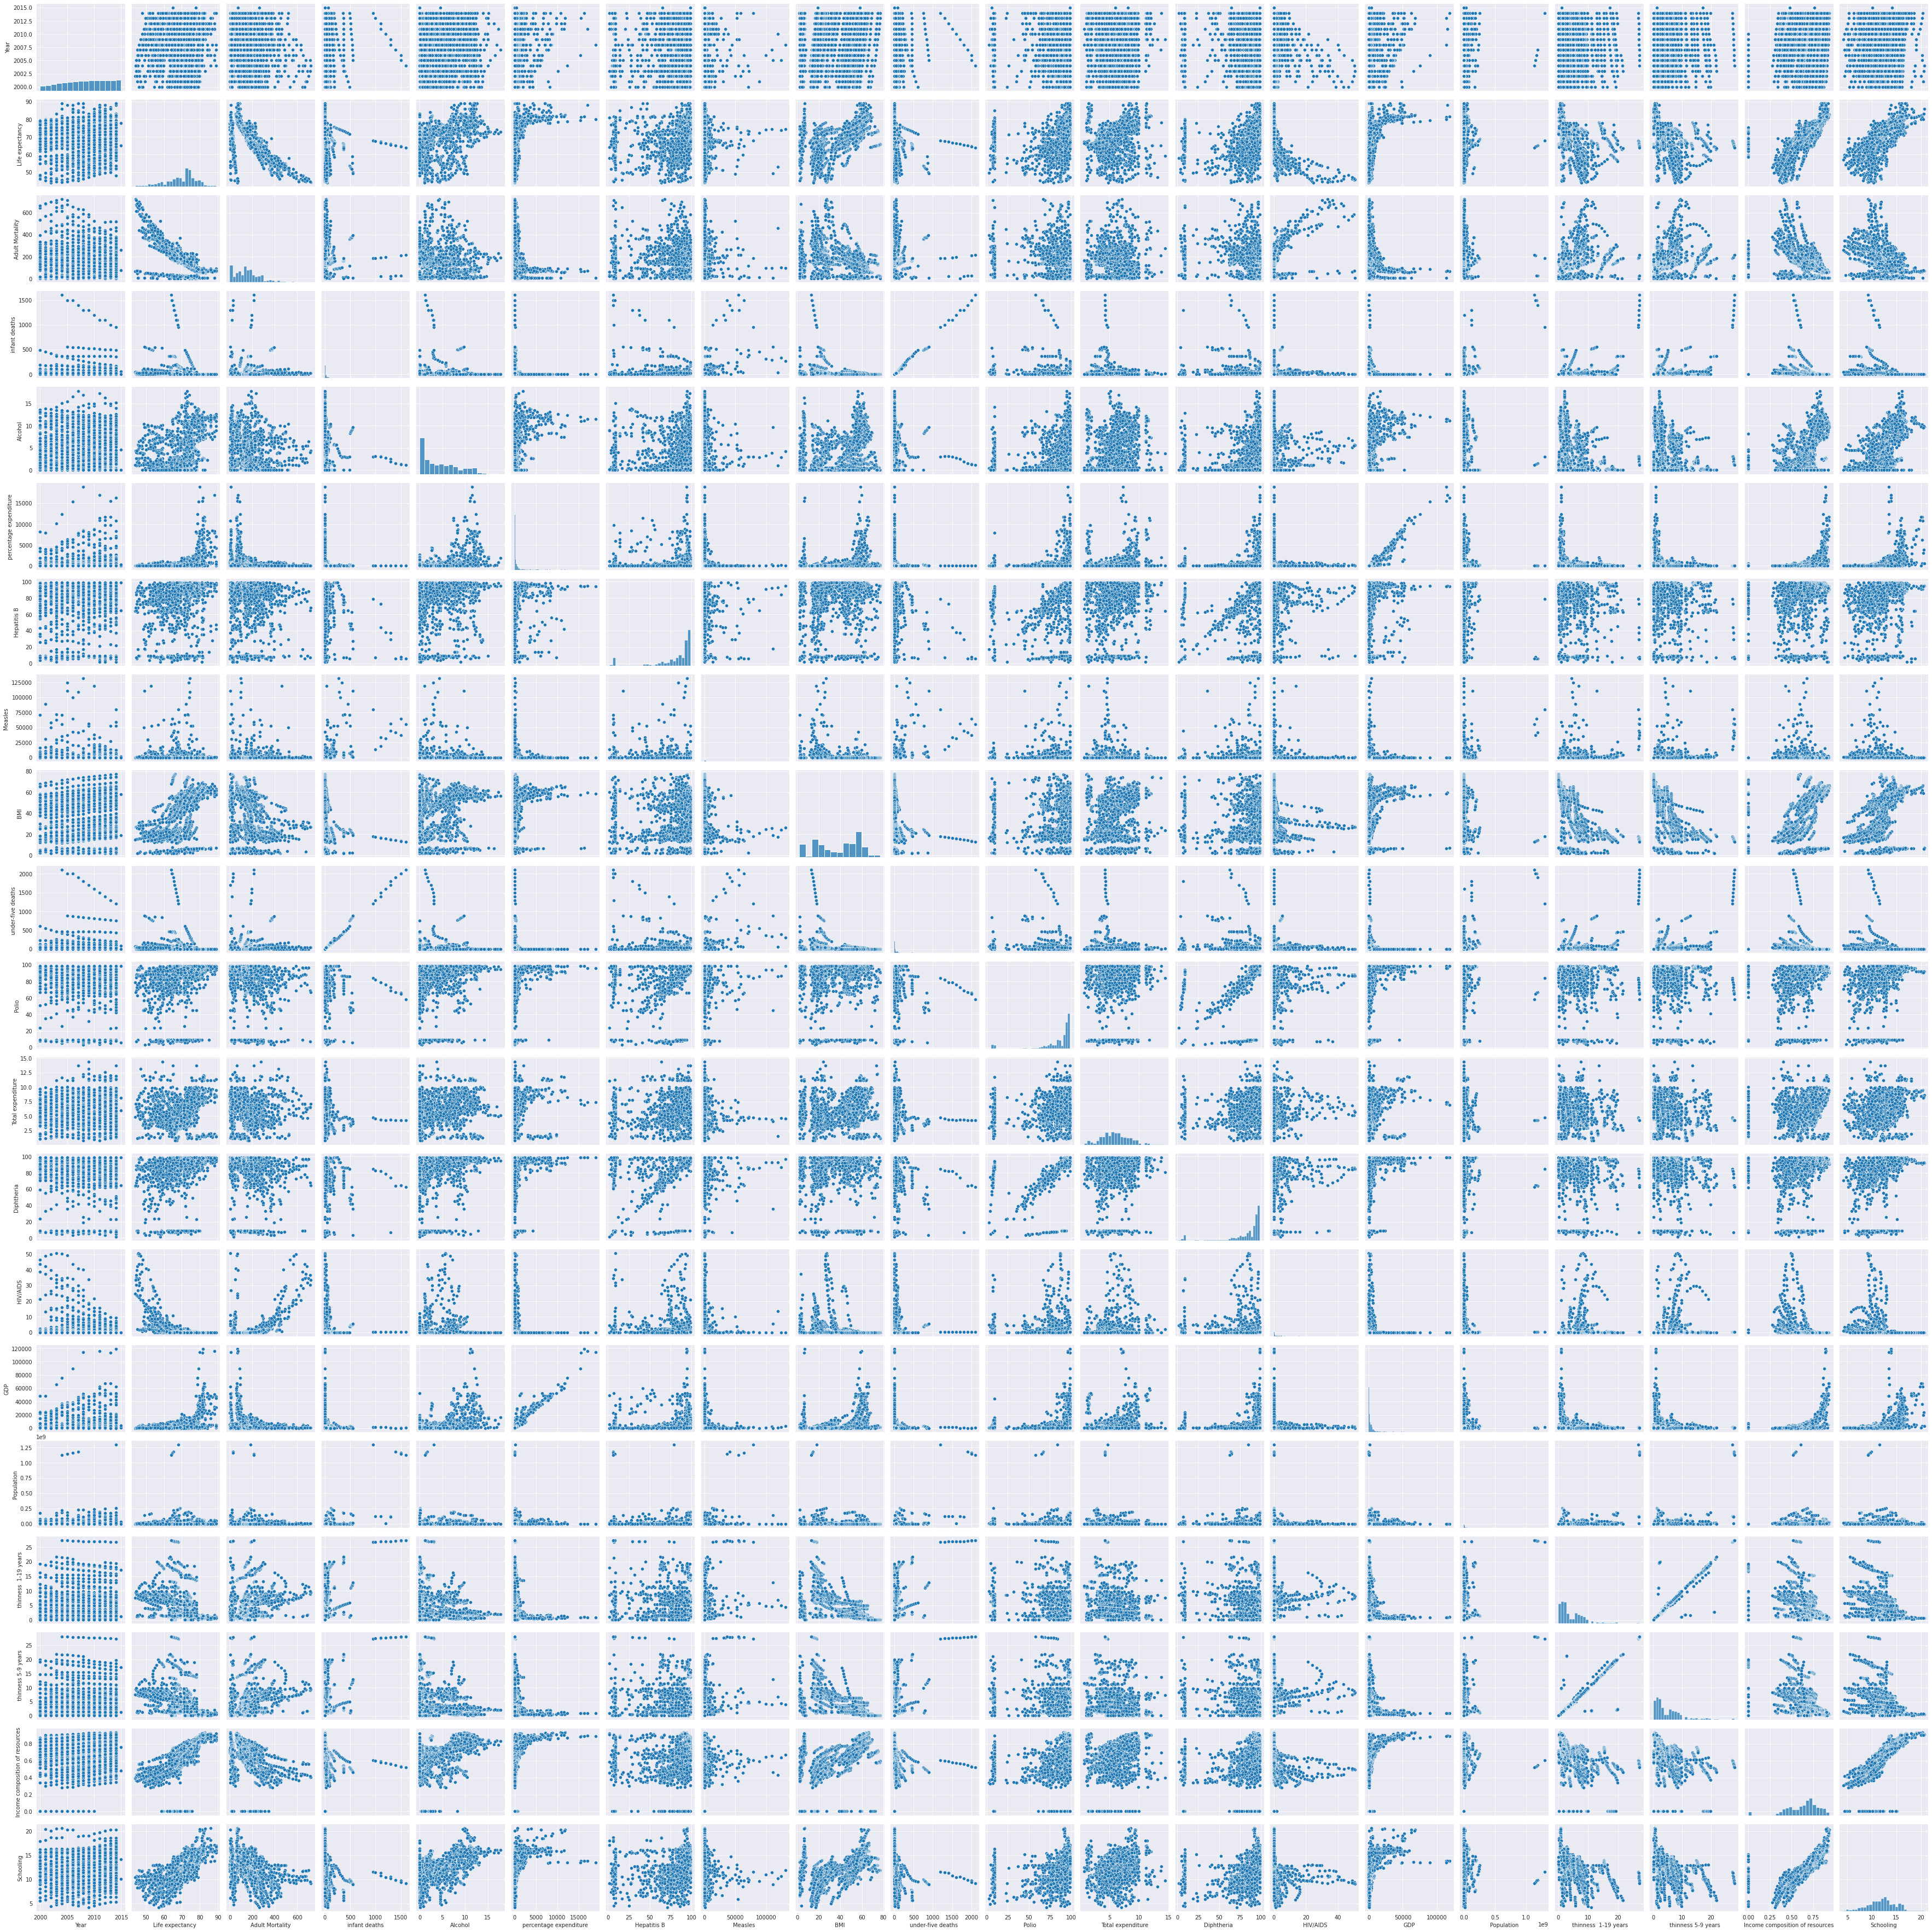

In [15]:
sns.pairplot(dataset)

# Linear regression

In [26]:
data = dataset.copy()

#drop the year, country and status columns
data.drop(["Year","Country","Status"], axis=1, inplace=True)

data.head()

Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0              65.0            263.0             62     0.01   
1              59.9            271.0             64     0.01   
2              59.9            268.0             66     0.01   
3              59.5            272.0             69     0.01   
4              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [29]:
#get features
X = data.iloc[:,1:].values
print(X.shape)

#get the targets
Y = data.iloc[:,0].values
print(Y.shape)

(1657, 18)
(1657,)


### Make a 70/20/10 training/validation/test split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=33)
X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test,test_size=0.1, random_state=33)

### Fit the linear regression model to the data

In [69]:
LR = LinearRegression()
LR_model = LR.fit(X_train, Y_train)

### Lets evaluate the model

In [70]:
#Make predictions using the training data
train_predictions = LR_model.predict(X_train)

#computer the Root Mean Square Error
rmse = np.sqrt(mean_squared_error(Y_train, train_predictions))
print(rmse)

3.499273811699407


In [71]:
#Compute the models accuracy on the training data
score = LR_model.score(X_train, Y_train) 
print(score)

0.8467356756488357


## Let's try to improve the model 

### Scaling and standardization

In [72]:
std_x_train = X_train
std_y_train = Y_train

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit(std_x_train)
std_x_train = std_scale.transform(std_x_train)

#create a model with the standardized data
std_LR = LinearRegression()
std_model = std_LR.fit(std_x_train, std_y_train)
#Make predictions using the training data
std_predictions = std_model.predict(std_x_train)

#computer the Root Mean Square Error
std_rmse = np.sqrt(mean_squared_error(std_y_train, std_predictions))
print(std_rmse)

#Compute the models accuracy on the training data
std_score = LR_model.score(X_train, Y_train) 
print(std_score)

3.499273811699407
0.8467356756488357


The same is tried but using a MinMaxScaler

In [73]:
norm_x_train = X_train
norm_y_train = Y_train

from sklearn.preprocessing import MinMaxScaler
norm_scale = MinMaxScaler().fit(norm_x_train)
norm_x_train = norm_scale.transform(norm_x_train)

#create a model with the normalized data
norm_LR = LinearRegression()
norm_model = norm_LR.fit(norm_x_train, norm_y_train)
#Make predictions using the training data
norm_predictions = norm_model.predict(norm_x_train)

#computer the Root Mean Square Error
norm_rmse = np.sqrt(mean_squared_error(norm_y_train, norm_predictions))
print(norm_rmse)

#Compute the models accuracy on the training data
norm_score = LR_model.score(X_train, Y_train) 
print(norm_score)

3.4992738116994064
0.8467356756488357


Let's see how the compare to one another graphically

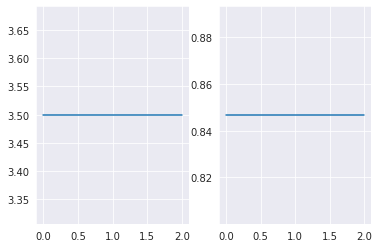

In [74]:
RMSEs = [rmse, std_rmse, norm_rmse]
x = [0, 1, 2]
plt.subplot(1,2,1)
plt.plot(x,RMSEs)

SCOREs = [score, std_score, norm_score]
x = [0, 1, 2]
plt.subplot(1,2,2)
plt.plot(x,SCOREs)

plt.show()

As the plot shows both standardization and normalization do not have any noticable effects, therefore the original data we be used in the final model as well

### Regularization
We first compute the error and score on the validation dataset to see is there is an overfit

In [75]:
#Make predictions using the validation data
val_predictions = LR_model.predict(X_val)

#compute the Root Mean Square Error
val_rmse = np.sqrt(mean_squared_error(Y_val, val_predictions))
print(val_rmse)

#Compute the model's accuracy on the validation data
val_score = LR_model.score(X_val, Y_val) 
print(val_score)

3.8168065045833
0.7939620899984823


The validation score might be lower than the training score due to a slight overfit. We test the effect of regularization 

In [77]:
scores = []
rmses = []
reg_vals = [1e-5, 1e-4,1e-3,1e-2,1e-1,1]

for reg_val in reg_vals:
    reg_lr = Ridge(alpha=reg_val)
    reg_model = reg_lr.fit(X_train, Y_train)
    #Make predictions using the validation data
    reg_predictions = reg_model.predict(X_val)
    #compute the Root Mean Square Error
    rmses.append(np.sqrt(mean_squared_error(Y_val, reg_predictions)))

    #Compute the model's accuracy on the validation data
    scores.append(reg_model.score(X_val, Y_val)) 

print(rmses)
print(scores)

[3.816806264864636, 3.816804107929339, 3.8167825423775326, 3.816567266480397, 3.814451981898709, 3.796609071160155]
[0.7939621158793495, 0.7939623487495705, 0.7939646770341582, 0.7939879181738622, 0.7942162141208327, 0.7961369062517831]


/home/walter/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18451e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/walter/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18453e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/walter/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.1847e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/walter/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18644e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/walter/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20386e-18): re

Let's see, in a plot, how the regularization term affects the validation error and score

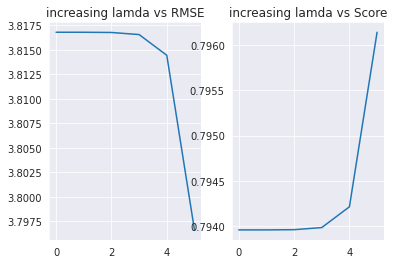

In [80]:
x = np.arange(0, len(reg_vals))
plt.subplot(1,2,1)
plt.title("increasing lamda vs RMSE")
plt.plot(x,rmses)

x = np.arange(0, len(reg_vals))
plt.subplot(1,2,2)
plt.title("increasing lamda vs Score")
plt.plot(x,scores)

plt.show()

While the plots show that a regularization of 1 has the bettter score, there are still very small, at an order of $10^{-2}$